<a href="https://colab.research.google.com/github/NiaRamadhani31/DIFG2130_B_25_2311531006/blob/main/Pratikum1/LinearRegreesion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kode ini mengimpor library yang diperlukan untuk **pemrosesan data (`pandas`, `numpy`)**, **visualisasi (`matplotlib`)**, **normalisasi data (`MinMaxScaler`)**, **regresi linear (`LinearRegression`)**, **evaluasi model (`mean_squared_error`)**, dan **membagi dataset (`train_test_split`)**. Selain itu, kode mengambil dataset **California Housing** dari **Scikit-Learn**, yang digunakan untuk analisis harga rumah berdasarkan berbagai fitur.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing

Kode ini mengambil dataset **California Housing**, menyimpannya dalam **DataFrame**, dan memisahkannya menjadi **variabel independen (`inputs`)** dan **variabel dependen (`targets`)**.  

1. **`fetch_california_housing()`** → Mengambil dataset **California Housing**.  
2. **Membuat `DataFrame`** dengan kolom fitur dari `housing.data` dan menambahkan **kolom target** (`MedHouseValues`).  
3. **`targets = df['MedHouseValues']`** → Menyimpan harga rumah sebagai **variabel dependen**.  
4. **`inputs = df.drop('MedHouseValues', axis=1)`** → Menghapus kolom target, menyisakan **variabel independen**.  
5. **`df.head()`** → Menampilkan **5 baris pertama** dari dataset untuk melihat strukturnya.

In [5]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
df= pd.DataFrame(data= housing.data, columns=housing.feature_names)
df['MedHouseValues'] = pd.Series(housing.target)

targets=df['MedHouseValues']                #Dependent Variable
inputs=df.drop('MedHouseValues', axis=1)    #Independent Variable
df.head()                                   # Menampilkan 5 data teratas

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValues
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Kode ini digunakan untuk **mengeksplorasi data** dalam DataFrame (`df`) dengan berbagai metode analisis dasar:  

1. **`df.describe()`** → Menampilkan statistik ringkasan seperti **mean, standar deviasi, min, max**, dan **kuartil** untuk setiap kolom numerik.  
2. **`df.info()`** *(dikomentari)* → Menampilkan informasi struktur DataFrame, termasuk **jumlah baris, kolom, tipe data, dan jumlah nilai non-null**.  
3. **`df.shape`** → Mengembalikan **dimensi DataFrame** dalam bentuk **(jumlah baris, jumlah kolom)**.  
4. **`print('Dataframe dimension: '.df.shape)`** *(keliru, harus `+ str(df.shape)`) → Menampilkan dimensi DataFrame dalam bentuk teks.  
5. **Analisis ini membantu memahami dataset sebelum pemrosesan lebih lanjut.**

In [10]:
 df.describe()
#df.info()
#print('Dataframe dimension: '.df.shape)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValues
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Kode ini membagi dataset **California Housing** menjadi **training set** dan **test set** menggunakan `train_test_split()`.  

1. **`train_test_split(inputs, targets, test_size=0.3, random_state=1)`**  
   - Memisahkan **70% data untuk training** dan **30% untuk testing** (`test_size=0.3`).  
   - `random_state=1` memastikan pembagian data **konsisten** setiap kali dijalankan.  

2. **`X_train, X_test`** → Data fitur untuk **training** dan **testing**.  
3. **`y_train, y_test`** → Data target (harga rumah) untuk **training** dan **testing**.  
4. **`print(X_train.shape, X_test.shape)`** → Menampilkan jumlah baris & kolom dari **training dan test set**.  
5. **`print(y_train.shape, y_test.shape)`** → Menampilkan jumlah data target untuk **training dan testing**.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.3, random_state=1)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(14448, 8) (6192, 8)
(14448,) (6192,)


Kode ini melakukan **normalisasi data** menggunakan **MinMaxScaler** agar semua fitur berada dalam rentang **0 hingga 1**, yang membantu meningkatkan performa model regresi.  

1. **`scaler = MinMaxScaler()`** → Membuat objek **MinMaxScaler** untuk normalisasi.  
2. **`X_train = scaler.fit_transform(X_train)`** → **Melatih (`fit`) scaler** menggunakan `X_train`, lalu **mentransformasi (`transform`)** datanya.  
3. **`X_test = scaler.transform(X_test)`** → **Mentransformasi `X_test`** menggunakan scaler yang sudah dilatih dengan `X_train` (tanpa `fit`, agar konsisten).  
4. **`X_test`** → Menampilkan data **test set** yang telah dinormalisasi.  
5. **Normalisasi ini penting** agar model regresi tidak terpengaruh oleh skala fitur yang berbeda.

In [13]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test

array([[1.89659453e-01, 7.45098039e-01, 2.59249620e-02, ...,
        8.26699958e-04, 1.61530287e-01, 5.94594595e-01],
       [1.01964111e-01, 7.05882353e-01, 2.93658328e-02, ...,
        1.49655077e-03, 4.50584485e-01, 4.52452452e-01],
       [2.42293210e-01, 8.82352941e-01, 2.57625553e-02, ...,
        2.43712035e-03, 5.51540914e-01, 1.88188188e-01],
       ...,
       [1.43901463e-01, 9.01960784e-01, 2.71911561e-02, ...,
        1.63065424e-03, 5.92986185e-01, 2.05205205e-01],
       [1.45508338e-01, 2.35294118e-01, 2.97484189e-02, ...,
        1.59782455e-03, 5.87672689e-01, 2.06206206e-01],
       [8.33367816e-02, 5.49019608e-01, 1.45501245e-02, ...,
        1.74904890e-03, 1.65781084e-01, 6.00600601e-01]])

Kode ini **melatih model regresi linear** dengan data yang telah dinormalisasi.  

1. **`lr_model = LinearRegression()`** → Membuat objek model **Linear Regression**.  
2. **`lr_model.fit(X_train, y_train)`** → Model **belajar hubungan** antara fitur (`X_train`) dan target (`y_train`) untuk **memprediksi harga rumah**.  
3. Setelah pelatihan, model dapat digunakan untuk **prediksi** dengan **`lr_model.predict()`**.

In [14]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

Kode ini mencetak **intercept** dan **koefisien (slope)** dari model regresi linear yang telah dilatih.  

1. **`lr_model.intercept_`** → Menampilkan **intercept** (titik potong garis regresi dengan sumbu Y).  
2. **`lr_model.coef_`** → Menampilkan **koefisien (slope)** untuk setiap fitur dalam `X_train`, yang menunjukkan **seberapa besar pengaruh tiap fitur terhadap harga rumah**.  
3. **Koefisien positif** berarti fitur tersebut meningkatkan harga rumah, sedangkan **koefisien negatif** berarti menurunkan harga rumah.

In [15]:
print(f'intercept: {lr_model.intercept_}')
print(f'slope: {lr_model.coef_}')

intercept: 3.721516132506502
slope: [  6.39513914   0.49408893 -14.78075919  20.98391128  -0.2003207
  -4.08551937  -3.98214561  -4.37460957]


Kode ini mengevaluasi **performa model regresi linear** menggunakan **Mean Squared Error (MSE)** dan **R-squared (R²)**.  

1. **`y_pred = lr_model.predict(X_test)`** → Model memprediksi harga rumah berdasarkan data uji (`X_test`).  
2. **`mse = mean_squared_error(y_test, y_pred)`** → Menghitung **MSE**, yaitu rata-rata kuadrat selisih antara nilai sebenarnya (`y_test`) dan prediksi (`y_pred`) (semakin kecil, semakin baik).  
3. **`r2 = lr_model.score(X_test, y_test)`** → Menghitung **R²**, yang menunjukkan seberapa baik model menjelaskan variasi data (nilai mendekati 1 berarti model baik).  
4. **`print(f'MSE: {mse}')`** → Mencetak nilai **MSE**.  
5. **`print(f'R2: {r2}')`** → Mencetak nilai **R-squared (R²)**.

In [17]:
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2=lr_model.score(X_test, y_test)
print(f'MSE: {mse}')
print(f'R2: {r2}')

MSE: 0.5296293151408232
R2: 0.597142973735963


Kode ini membuat **scatter plot** untuk membandingkan nilai aktual (`y_test`) dengan nilai prediksi (`y_pred`).  

1. **`plt.scatter(y_test, y_pred)`** → Membuat scatter plot dengan **nilai aktual** sebagai sumbu X dan **nilai prediksi** sebagai sumbu Y.  
2. **`plt.xlabel('Actual Values')`** → Memberi label sumbu X sebagai **"Actual Values"**.  
3. **`plt.ylabel('Predicted Values')`** → Memberi label sumbu Y sebagai **"Predicted Values"**.  
4. **`plt.title('Actual vs Predicted Values')`** → Menambahkan judul grafik.  
5. **`plt.show()`** → Menampilkan plot untuk **melihat seberapa baik model memprediksi nilai sebenarnya** (jika titik-titik mendekati garis y = x, berarti prediksi akurat).

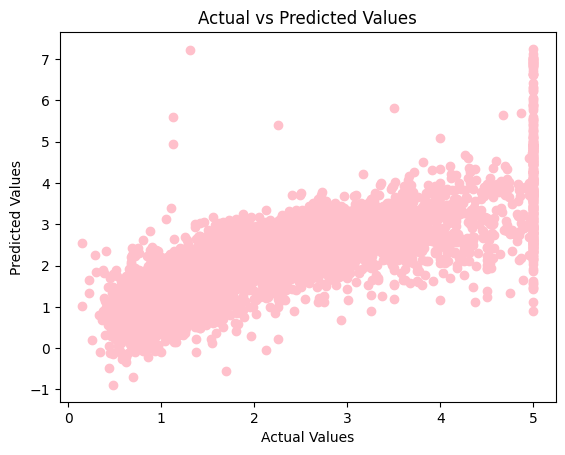

In [21]:
plt.scatter(y_test, y_pred, color = 'pink')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()